In [1]:
import matplotlib.pyplot as plt
import time
import diskchef.uv.galariochef
from diskchef.model.model import Model
from pathlib import Path
import astropy.table
from diskchef.lamda.line import Line
from diskchef.physics.yorke_bodenheimer import YorkeBodenheimer2008
from diskchef.uv.galariochef import Residual
from diskchef.uv.uvfits_to_visibilities_ascii import UVFits
from astropy import units as u
import numpy as np
import emcee
from spectral_cube import SpectralCube
from matplotlib import pyplot as plt
from astropy import constants as c
import logging
from tqdm import tqdm
from galario.double import sampleImage, chi2Image
from astropy.visualization import quantity_support

quantity_support()

logging.basicConfig(level="INFO")

In [2]:
model_reference_path = Path("Default") / "radmc_gas"
model_comparison_paths = Path("fit2").glob("fit_*/radmc_gas")

print(model_reference_path)
print(list(model_comparison_paths))


def residual(folder1: Path, folder2: Path):
    data1 = Residual(folder1)
    data2 = Residual()
    return 0

# cube = SpectralCube(model_reference_path)
# vis = sampleImage(image, dxy, u, v)

Default/radmc_gas
[PosixPath('fit2/fit_3wxvzbly/radmc_gas'), PosixPath('fit2/fit_5jmejov9/radmc_gas'), PosixPath('fit2/fit_5_qcta_g/radmc_gas'), PosixPath('fit2/fit_7cily2w3/radmc_gas'), PosixPath('fit2/fit_8o0d_5dc/radmc_gas'), PosixPath('fit2/fit_94af5h_f/radmc_gas'), PosixPath('fit2/fit_9ikbtuta/radmc_gas'), PosixPath('fit2/fit_9uf_4pys/radmc_gas'), PosixPath('fit2/fit_bs_hsipx/radmc_gas'), PosixPath('fit2/fit_d2eh2k3d/radmc_gas'), PosixPath('fit2/fit_d_vm6yno/radmc_gas'), PosixPath('fit2/fit_fwulv0ab/radmc_gas'), PosixPath('fit2/fit_g545lkyd/radmc_gas'), PosixPath('fit2/fit_gq6bgq5k/radmc_gas'), PosixPath('fit2/fit_i3089s87/radmc_gas'), PosixPath('fit2/fit_ibm7isg0/radmc_gas'), PosixPath('fit2/fit_ijl0pmw6/radmc_gas'), PosixPath('fit2/fit_jg7vmffu/radmc_gas'), PosixPath('fit2/fit_jv1nezf7/radmc_gas'), PosixPath('fit2/fit_lhfmrc6h/radmc_gas'), PosixPath('fit2/fit_mqfc61a3/radmc_gas'), PosixPath('fit2/fit_m_g2f4v9/radmc_gas'), PosixPath('fit2/fit_n8atoilb/radmc_gas'), PosixPath('fit2

### Get UV coordinates of a real uvfits file from PRODIGE

INFO:diskchef.uv.uvfits_to_visibilities_ascii.UVFits:Creating an instance of UVFits


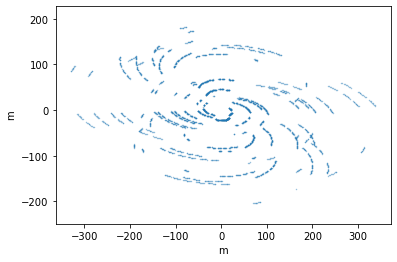

In [3]:
uvdata = UVFits("s-Line-22-CO_1+D.uvfits", 'all', sum=False)
uvdata.plot_uvgrid()

Optionally, pickle it

In [4]:
uvdata.pickle("demo.pkl")

Should be same

In [5]:
uvdata_from_pickle = UVFits("demo.pkl")
assert np.all(uvdata.u == uvdata_from_pickle.u)
assert np.all(uvdata.v == uvdata_from_pickle.v)

INFO:diskchef.uv.uvfits_to_visibilities_ascii.UVFits:Creating an instance of UVFits


By the way, don't use `assert` in your production code to check anything outside of tests! Here it is a test case

### Transform reference model to UV coordinates as in PRODIGE

In [6]:
reference_image = Path("Default") / "radmc_gas" / "CO J=2-1_image.fits"
uvdata.image_to_visibilities(reference_image)
uvdata_from_pickle.image_to_visibilities(reference_image)

are they same..?

In [7]:
uvdata.visibility.shape

(3018, 21)

In [8]:
uvdata_from_pickle.visibility.shape


(3018, 21)

## Comparisons
Model with itself, should be 0

In [9]:
uvdata.chi2_with(model_reference_path / "CO J=2-1_image.fits")

0.0

Model with all other models

In [10]:
folders = sorted(Path("fit2").glob("fit_*"))
residuals = []
for folder in tqdm(folders):
    data = folder / "radmc_gas" / "CO J=2-1_image.fits"
    residual = uvdata.chi2_with(data, check=False)
    residuals.append(residual)
residuals

100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


[304.4215793207531,
 211.06664945937447,
 200.60682189267558,
 165.66349194922083,
 418.9934818746358,
 384098.83635495475,
 196.47586319223345,
 448.31464973223416,
 357.9821675396242,
 437.22514949533985,
 201.27631160822898,
 1199.4004724705444,
 449.12251725037004,
 395.1679625965929,
 327.0499764227195,
 266.1343968338911,
 230.37376759911533,
 3067.8520181789545,
 570.5346535699219,
 788.7814667988054,
 659.6421379493322,
 684.7921523239571,
 11855.478211096524,
 410.9305204053137,
 545.1838821305411,
 360.10881510139353,
 318.9004802822689,
 3161.9263419338768,
 283.60246624314726,
 514.6946664340554,
 664.3351558602186,
 373.68990637736954,
 324.160205448874,
 670.3137975493438,
 297.63790776633556,
 588.2525952023178,
 582.5137842685223,
 455.61752930274866,
 423.7837249645592,
 249.67146915255663]

In [11]:
folders = sorted(Path("fit2").glob("fit_*"))
residuals_from_pickle = []
for folder in tqdm(folders):
    data = folder / "radmc_gas" / "CO J=2-1_image.fits"
    residual = uvdata_from_pickle.chi2_with(data, check=False)
    residuals_from_pickle.append(residual)
residuals_from_pickle


100%|██████████| 40/40 [00:28<00:00,  1.39it/s]


[304.4215793207531,
 211.06664945937447,
 200.60682189267558,
 165.66349194922083,
 418.9934818746358,
 384098.8363549548,
 196.47586319223345,
 448.31464973223416,
 357.9821675396242,
 437.2251494953398,
 201.276311608229,
 1199.4004724705444,
 449.12251725037004,
 395.16796259659293,
 327.04997642271957,
 266.13439683389106,
 230.37376759911533,
 3067.852018178955,
 570.5346535699219,
 788.7814667988054,
 659.6421379493322,
 684.792152323957,
 11855.478211096524,
 410.9305204053137,
 545.183882130541,
 360.10881510139353,
 318.9004802822689,
 3161.9263419338768,
 283.60246624314726,
 514.6946664340554,
 664.3351558602185,
 373.68990637736954,
 324.160205448874,
 670.3137975493439,
 297.6379077663356,
 588.2525952023178,
 582.5137842685222,
 455.6175293027487,
 423.78372496455927,
 249.67146915255657]

In [19]:
np.testing.assert_allclose(np.array(residuals_from_pickle), np.array(residuals))

In [ ]:
refdata = SpectralCube.read(model_reference_path / "CO J=2-1_image.fits")
data = SpectralCube.read(Path("fit2") / "fit_3wxvzbly" / "radmc_gas" / "CO J=2-1_image.fits")
pixel_area_units = (u.Unit(data.wcs.celestial.world_axis_units[0])
                   * u.Unit(data.wcs.celestial.world_axis_units[1]))
pixel_area = astropy.wcs.utils.proj_plane_pixel_area(data.wcs.celestial) * pixel_area_units
dxy = np.sqrt(pixel_area).to_value(u.rad)
print(pixel_area, dxy)
data = (data * pixel_area).to(u.Jy)

print(data.spectral_axis)
print(uvdata.frequencies)
print(uvdata.frequencies/data.spectral_axis)

for i in range(21):
    fig, ax = plt.subplots(2)
    ax[0].imshow(data[i].value)
    ax[1].imshow(refdata[i].value)
    # print(sampleImage(data[i], dxy,
    #                   (uvdata.u / c.c * data.spectral_axis[i]),
    #                   (uvdata.v / c.c * data.spectral_axis[i])))
    chi2=chi2Image(
        image=data[i],
        dxy=dxy,
        u=(uvdata.u / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
        v=(uvdata.v / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
        vis_obs_re=uvdata.re.T[i].astype('float64').to_value(u.Jy),
        vis_obs_im=uvdata.im.T[i].astype('float64').to_value(u.Jy),
        vis_obs_w=uvdata.weight.T[i].astype('float64').to_value(u.Jy ** -2),
        check=True
    )
    #
    # print("\n\n\n{u}\n{v}\n{vis_obs_re}\n{vis_obs_im}\n{vis_obs_w}\n{image}\n{dxy}\n\n".format(
    #     image=data[i].shape,
    #     dxy=dxy,
    #     u=(uvdata.u / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
    #     v=(uvdata.v / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
    #     vis_obs_re=uvdata.re.T[i].astype('float64').to_value(u.Jy),
    #     vis_obs_im=uvdata.im.T[i].astype('float64').to_value(u.Jy),
    #     vis_obs_w=uvdata.weight.T[i].astype('float64').to_value(u.Jy ** -2), )
    # )
    fig.suptitle(f"$\chi^2 = {chi2:.2f}$")
    print(chi2)

In [ ]:
refdata = SpectralCube.read(model_reference_path / "CO J=2-1_image.fits")
data = SpectralCube.read(model_reference_path / "CO J=2-1_image.fits")
pixel_area_units = (u.Unit(data.wcs.celestial.world_axis_units[0])
                   * u.Unit(data.wcs.celestial.world_axis_units[1]))
pixel_area = astropy.wcs.utils.proj_plane_pixel_area(data.wcs.celestial) * pixel_area_units
dxy = np.sqrt(pixel_area).to_value(u.rad)
print(pixel_area, dxy)
data = (data * pixel_area).to(u.Jy)

print(data.spectral_axis)
print(uvdata.frequencies)
print(uvdata.frequencies/data.spectral_axis)

for i in range(21):
    fig, ax = plt.subplots(2)
    ax[0].imshow(data[i].value)
    ax[1].imshow(refdata[i].value)
    # print(sampleImage(data[i], dxy,
    #                   (uvdata.u / c.c * data.spectral_axis[i]),
    #                   (uvdata.v / c.c * data.spectral_axis[i])))
    chi2=chi2Image(
        image=data[i],
        dxy=dxy,
        u=(uvdata.u / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
        v=(uvdata.v / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
        vis_obs_re=uvdata.re.T[i].astype('float64').to_value(u.Jy),
        vis_obs_im=uvdata.im.T[i].astype('float64').to_value(u.Jy),
        vis_obs_w=uvdata.weight.T[i].astype('float64').to_value(u.Jy ** -2),
        check=False
    )
    #
    # print("\n\n\n{u}\n{v}\n{vis_obs_re}\n{vis_obs_im}\n{vis_obs_w}\n{image}\n{dxy}\n\n".format(
    #     image=data[i].shape,
    #     dxy=dxy,
    #     u=(uvdata.u / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
    #     v=(uvdata.v / c.c * data.spectral_axis[i]).to_value(u.dimensionless_unscaled),
    #     vis_obs_re=uvdata.re.T[i].astype('float64').to_value(u.Jy),
    #     vis_obs_im=uvdata.im.T[i].astype('float64').to_value(u.Jy),
    #     vis_obs_w=uvdata.weight.T[i].astype('float64').to_value(u.Jy ** -2), )
    # )
    fig.suptitle(f"$\chi^2 = {chi2:.2f}$")
    print(chi2)


In [ ]:
chi2Image(
    image=data[0],
    dxy=dxy,
    u=(uvdata.u / _wavelength).to_value(u.dimensionless_unscaled),
    v=(uvdata.v / _wavelength).to_value(u.dimensionless_unscaled),
    vis_obs_re=_re.astype('float64').to_value(u.Jy),
    vis_obs_im=_im.astype('float64').to_value(u.Jy),
    vis_obs_w=_weight.astype('float64').to_value(u.Jy ** -2),
)
